In [1]:
# Run this cell.
from datascience import *
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import warnings
warnings.filterwarnings('ignore')

<img src="https://github.com/data-6-berkeley/materials-fa24/blob/main/hw/hw03/data6.png?raw=true" style="width: 15%; float: right; padding: 1%; margin-right: 2%;"/>

# Bickel Case Study

**Goals:**
- Load and inspect real admissions data  
- Compare overall and department-level admission rates by gender  
- Visualize Simpson’s Paradox  

**Dataset Source:** The [dataset](https://discovery.cs.illinois.edu/dataset/berkeley/) used in this notebook is a cleaned version of the original UC Berkeley 1973 graduate admissions data, processed by the University of Illinois at Urbana-Champaign.

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## 1973 UC Berkeley Graduate Admissions

In [2]:
# Load data from CSV
cal_data = Table.read_table('UCBerkeley1973_Admission.csv')
cal_data.show(5)

Year,Major,Gender,Admission
1973,C,F,Rejected
1973,B,M,Accepted
1973,Other,F,Accepted
1973,Other,M,Accepted
1973,Other,M,Rejected


In [3]:
total_f = sum(cal_data.column("Gender") == "F")
total_m = sum(cal_data.column("Gender") == "M")
accepted_f = cal_data.where("Admission", "Accepted").where("Gender", "F").num_rows
accepted_m =  cal_data.where("Admission", "Accepted").where("Gender", "M").num_rows
acceptance_rate_f = accepted_f / total_f 
acceptance_rate_m = accepted_m / total_m
print("1973's Berkeley admission rate seems to be: female:", acceptance_rate_f * 100, "and male:", acceptance_rate_m * 100)

1973's Berkeley admission rate seems to be: female: 34.5753297848 and male: 44.2786069652


<hr style="border: 1px solid #fdb515;" />

## Data Talk

<div class="alert alert-info">

1. **What do you notice?**

2. **What do you wonder?**

3. **What story does this tell, especially about the community this data may impact?**

</div>

| Group   | Applicants | Admitted | Men Applicants | Men Admitted                                | Women Applicants | Women Admitted |
|---------|------------|----------|----------------|----------------------------------------------|------------------|----------------|
| **Total** | 12,763 | 41%   | 8,442       | <span style="color:green"><b>44%</b></span> | 4,321         | **35%**          |

| Dept | All Applicants | All Admitted | Men Applicants | Men Admitted | Women Applicants | Women Admitted |
|------|----------------|--------------|----------------|--------------|------------------|----------------|
| A    | 933            | 64%          | <span style="color:blue"><b>**825**</b></span> | 62%          | 108              | <span style="color:green"><b>82%</b></span> |
| B    | 585            | 63%          | <span style="color:blue"><b>**560**</b></span> | 63%          | 25               | <span style="color:green"><b>68%</b></span> |
| C    | 918            | 35%          | 325            | <span style="color:green"><b>37%</b></span> | <span style="color:blue"><b>**593**</b></span> | 34% |
| D    | 792            | 34%          | <span style="color:blue"><b>417</b></span> | 33%          | 375              | 35% |
| E    | 584            | 25%          | 191            | <span style="color:green"><b>28%</b></span> | <span style="color:blue"><b>**393**</b></span> | 24% |
| F    | 714            | 6%           | <span style="color:blue"><b>373</b></span> | 6%           | 341              | <span style="color:green"><b>7%</b></span> |
| **Total** | **4,526**      | **39%**       | **2,691**      | **45%**       | **1,835**        | **30%**        |

<hr style="border: 1px solid #fdb515;" />

## Visualization Talk

<div class="alert alert-info">

1. **What do you notice?**

2. **What do you wonder?**

3. **What columns plotted what?** (Focus on axes)

</div>

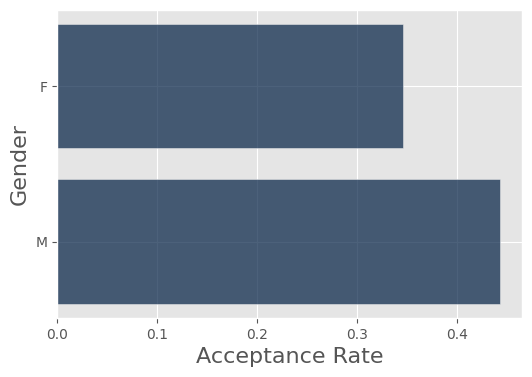

In [4]:
admissions = cal_data.pivot('Admission', 'Gender').with_column("Acceptance Rate", make_array(acceptance_rate_f, acceptance_rate_m))
admissions.barh("Gender", "Acceptance Rate")

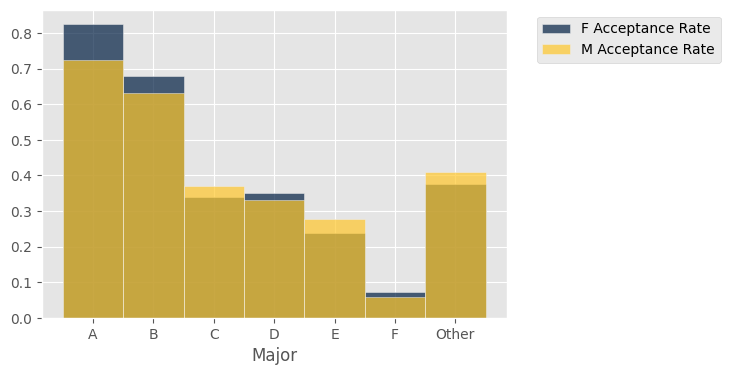

In [5]:
admission_major = cal_data.pivot('Gender', 'Major', collect = lambda x: sum(x == 'Accepted') / len(x), values = 'Admission')
admission_major = admission_major.relabeled(['F', 'M'], ['F Acceptance Rate', 'M Acceptance Rate'])
admission_major.bar('Major', overlay = True)

<hr style="border: 1px solid #fdb515;" />

## Simpson’s Paradox Coding

Instead of visualizing admission rates, let’s focus on the total number of admitted applicants. Modify the code to produce a bar chart as shown below:

<img src="https://github.com/dubois-ctds/data6-nwdse-2025/blob/main/visualizations-workshop/barchart.png?raw=true" alt="Bar Chart"/>

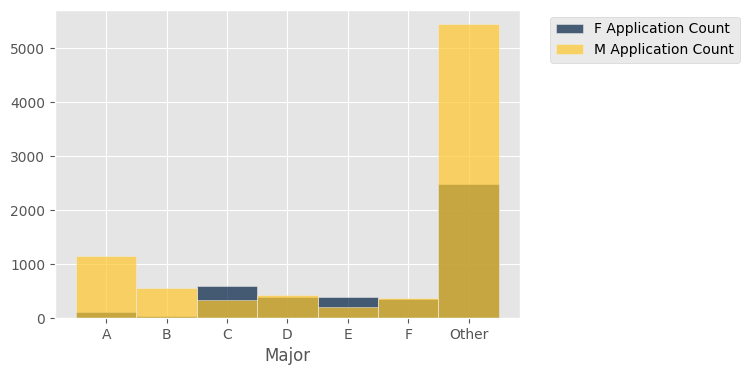

In [6]:
num_applicants = cal_data.group(['Major', 'Gender']).pivot('Gender', 'Major', collect = np.sum, values = 'count')
num_applicants = num_applicants.relabeled(['F', 'M'], ['F Application Count', 'M Application Count'])
num_applicants.bar('Major') # barchart